#**Lab Assignment No 4: Morphology and Segmentation**

In [0]:
#Code Belongs to RAJAT KHANNA (2017UCS0050)
#IMPORTING LIBRARIES
import pandas as pd
import PIL
from PIL import Image
import numpy as np
import cv2
from PIL import Image, ImageOps
import sys
import random
import numpy
import math
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [0]:
#LINKING COLAB TO DRIVE
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from google.colab import files

*1. Erosion operation can be used for various operations*

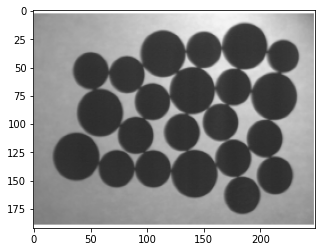

In [0]:
#Importing Images
coin = "/content/drive/My Drive/CVassignment-4/coins.png"
coinImage = imread(coin)
plt.imshow(coinImage)
plt.savefig('coinImage.jpg')
files.download("coinImage.jpg") 

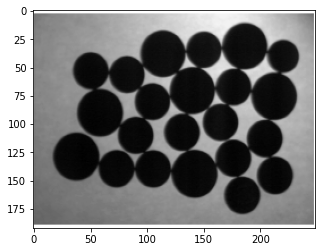

In [0]:
#Importing Images
coin = "/content/drive/My Drive/CVassignment-4/coins.png"
coinImage = cv2.imread(coin,0)
plt.imshow(coinImage,cmap='gray')
plt.savefig('coinImageGray.jpg')
files.download("coinImageGray.jpg") 

*(a) For the image coins.png given below use erosion operation to highlight distinct circles
present in the image. The original image is in grayscale which can be binarized by
Thresholding.*

In [0]:
ret,thresh1 = cv2.threshold(coinImage,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(coinImage,127,255,cv2.THRESH_BINARY_INV)

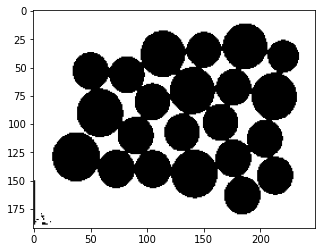

In [0]:
plt.imshow(thresh1,cmap='gray')
plt.savefig('thresh1coinImage.jpg')
files.download("thresh1coinImage.jpg") 

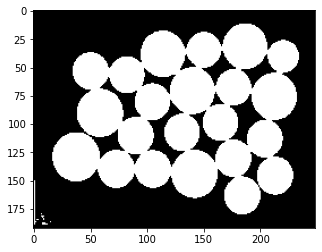

In [0]:
plt.imshow(thresh2,cmap='gray')
plt.savefig('thresh2coinImage.jpg')
files.download("thresh2coinImage.jpg") 

In [0]:
thresh2.shape

(192, 249)

*(b) Also develop a labelling algorithm to count the number of coins present.*

In [0]:
import skimage
from skimage import morphology

In [0]:
se = skimage.morphology.disk(3)

In [0]:
#erodedImage = skimage.morphology.binary_erosion(thresh2,se)
erosion = cv2.erode(thresh2, se, iterations=2)

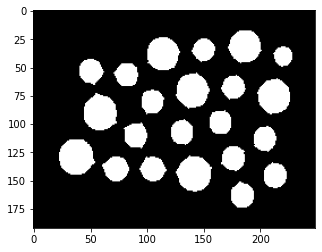

In [0]:
plt.imshow(erosion,cmap='gray')
plt.savefig('erosioncoinImage.jpg')
files.download("erosioncoinImage.jpg") 

In [0]:
cv2.imwrite('erodedImage.jpg',erosion)
path = "/content/erodedImage.jpg"

In [0]:
erosionLoaded = cv2.imread(path,0)

In [0]:
erosionLoaded.shape

(192, 249)

In [0]:
se = skimage.morphology.disk(4)
plz = cv2.erode(thresh2, se, iterations=2)

In [0]:
num_labels, labels_im = cv2.connectedComponents(plz)

In [0]:
num_labels
print("Number of coins are: ",num_labels)

Number of coins are:  23


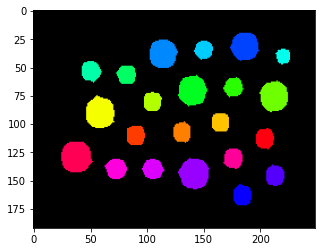

In [0]:
def imshow_components(labels):
    label_hue = np.uint8(179*labels/np.max(labels))
    blank_ch = 255*np.ones_like(label_hue)
    labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
    labeled_img[label_hue==0] = 0
    plt.imshow(labeled_img)

imshow_components(labels_im)
plt.savefig('labelCoinImage.jpg')
files.download("labelCoinImage.jpg") 


In [0]:
def colourize(img):
    height, width = img.shape
    colors = []
    colors.append([])
    colors.append([])
    color = 1
    coloured_img = Image.new("RGB", (width, height))
    coloured_data = coloured_img.load()
    for i in range(len(img)):
        for j in range(len(img[0])):
            if img[i][j] > 0:
                if img[i][j] not in colors[0]:
                    colors[0].append(img[i][j])
                    colors[1].append((random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)))
                ind = colors[0].index(img[i][j])
                coloured_data[j, i] = colors[1][ind]
    return coloured_img, len(colors[0])


def binarize(img_array, threshold=130):
    for i in range(len(img_array)):
        for j in range(len(img_array[0])):
            if img_array[i][j] > threshold:
                img_array[i][j] = 0
            else:
                img_array[i][j] = 1
    return img_array


def ccl4(img_array):
    print("starting first pass")
    curr_label = 1;
    img_array = numpy.array(img_array)
    labels = numpy.array(img_array)
    label_conv = []
    label_conv.append([])
    label_conv.append([])
    count = 0
    for i in range(1, len(img_array)):
        for j in range(1, len(img_array[0])):
            if img_array[i][j] > 0:
                label_x = labels[i][j - 1]
                label_y = labels[i - 1][j]
                if label_x > 0:
                    if label_y > 0:
                        if not label_x == label_y:
                            labels[i][j] = min(label_x, label_y)
                            if max(label_x, label_y) not in label_conv[0]:
                                label_conv[0].append(max(label_x, label_y))
                                label_conv[1].append(min(label_x, label_y))
                            elif max(label_x, label_y) in label_conv[0]:
                                ind = label_conv[0].index(max(label_x, label_y))
                                if label_conv[1][ind] > min(label_x, label_y):
                                    l = label_conv[1][ind]
                                    label_conv[1][ind] = min(label_x, label_y)
                                    while l in label_conv[0] and count < 100:
                                        count += 1
                                        ind = label_conv[0].index(l)
                                        l = label_conv[1][ind]
                                        label_conv[1][ind] = min(label_x, label_y)

                                    label_conv[0].append(l)
                                    label_conv[1].append(min(label_x, label_y))
                        else:
                            labels[i][j] = label_y
                    else:
                        labels[i][j] = label_x
                elif label_y > 0:
                    labels[i][j] = label_y
                else:
                    labels[i][j] = curr_label
                    curr_label += 1

    print("starting second pass")
    count = 1
    for idx, val in enumerate(label_conv[0]):

        if label_conv[1][idx] in label_conv[0] and count < 100:
            count += 1
            ind = label_conv[0].index(label_conv[1][idx])
            label_conv[1][idx] = label_conv[1][ind]

    for i in range(1, len(labels)):
        for j in range(1, len(labels[0])):

            if labels[i][j] in label_conv[0]:
                ind = label_conv[0].index(labels[i][j])
                labels[i][j] = label_conv[1][ind]

    return labels, count, curr_label

In [0]:
se = skimage.morphology.disk(6)
plzz = cv2.erode(thresh2, se, iterations=2)
img = Image.open(path)

img = img.convert('L')
img = ImageOps.expand(img, border=1, fill='white')
img = numpy.array(img)
img = binarize(img)

img,p1,p2 = ccl4(plzz)

starting first pass
starting second pass


In [0]:
cimg,x = colourize(plzz)

In [0]:
p1

35

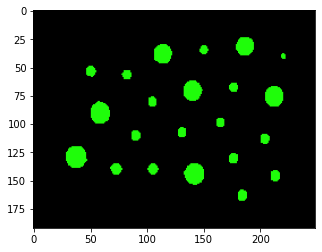

In [0]:
plt.imshow(cimg)
plt.savefig('colourizeCoinImage.jpg')
files.download("colourizeCoinImage.jpg") 

*2) Sketch the result of applying the hit-or-miss transform to the image below, 
using the SE
shown. Indicate clearly the origin and border you selected for the structuring element.
[10]*

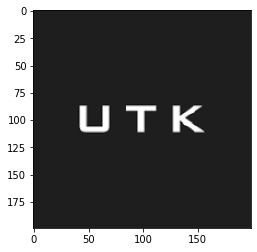

In [0]:
img2 = "/content/drive/My Drive/CVassignment-4/ques2image.png"
image2 = cv2.imread(img2,0)
plt.imshow(image2,cmap='gray')
plt.savefig('UTK.jpg')
files.download("UTK.jpg") 


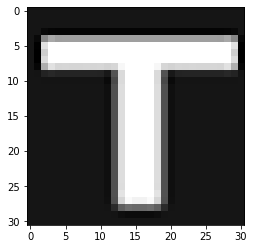

In [0]:
img2s = "/content/drive/My Drive/CVassignment-4/ques2structure.png"
image2struct = cv2.imread(img2s,0)
plt.imshow(image2struct,cmap='gray')
plt.savefig('T.jpg')
files.download("T.jpg") 

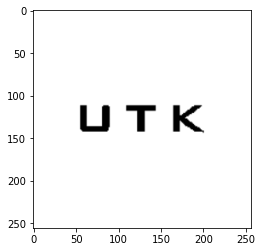

In [0]:
ret,image2 = cv2.threshold(image2,127,255,cv2.THRESH_BINARY_INV)
image2 = cv2.resize(image2,(256,256))
plt.imshow(image2,cmap='gray')
plt.savefig('UTKThresh.jpg')
files.download("UTKThresh.jpg") 

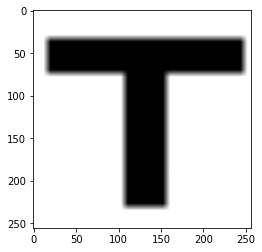

In [0]:
ret,image2struct = cv2.threshold(image2struct,127,255,cv2.THRESH_BINARY_INV)
image2struct = cv2.resize(image2struct,(256,256))
plt.imshow(image2struct,cmap='gray')
plt.savefig('Tthresh.jpg')
files.download("Tthresh.jpg") 

(512, 512)


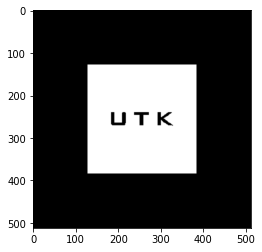

In [0]:
x = image2.shape[0]                    
y = image2struct.shape[0]
padded_img = np.zeros([x+y,x+y])
for i in range(int(y/2),int((y/2)+x)):
    for j in range(int(y/2),int((y/2)+x)):
        padded_img[i,j] = image2[int(i-(y/2)),int(j-(y/2))]
plt.imshow(padded_img,cmap='gray')

print(padded_img.shape)

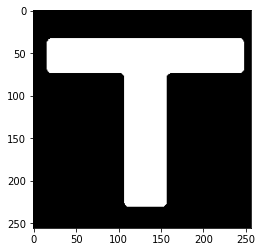

In [0]:
p,q = 26,26
mask = np.zeros([p,q])
for i in range(25,25+x):
    for j in range(25,25+x):
        if padded_img[i,j] == 255:
            mask = padded_img[i-25:i+26,j-25:j+26]
            for l in range(50):
                for m in range(50):
                    if mask[l,m] != image2struct[l,m]:
                        padded_img[i,j] = 0 
            mask = np.zeros([p,q])
            
image2UTK = np.zeros([275,275])
for i in range(int(y/2),int((y/2)+x)):
    for j in range(int(y/2),int((y/2)+x)):
        image2UTK[i-int(y/2),j-int(y/2)] = padded_img[i,j] 


def rev_thresholding(img_name,T):
    for x in range(img_name.shape[0]):
        for y in range(img_name.shape[1]):
            if img_name[x,y] > T:
                img_name[x,y] = 0
            else:
                img_name[x,y] = 255
    return img_name

final = rev_thresholding(image2UTK,128)
output = rev_thresholding(image2struct,128)
plt.imshow(output,cmap='gray')
plt.savefig('outputUTK.jpg')
files.download("outputUTK.jpg") 

*3) Opening and Closing: For the image Circles and lines given below develop opening based
MF to separate lines from circles. {BONUS} [20].
Save two files, one showing only circles and one showing only lines. Explain the
structural element you have used. If you have experimented with other structural
elements, describe your results and observations. Apply opening to the same image with
the same structural element of different sizes. How the sizes of the structuring elements
affect the results.*

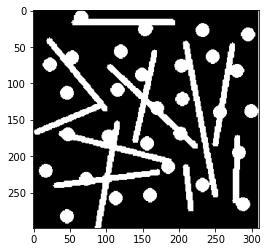

In [0]:
# https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html
img3 = "/content/drive/My Drive/CVassignment-4/circles_lines.png"
circles_lines=cv2.imread(img3,0)
ret,circles_linesbin = cv2.threshold(circles_lines,127,255,cv2.THRESH_BINARY)
plt.imshow(circles_linesbin,cmap='gray')
plt.savefig('circles&Lines.jpg')
files.download("circles&Lines.jpg") 

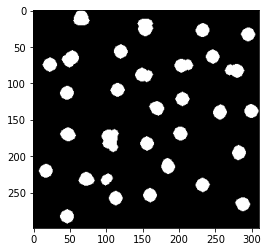

In [0]:
# Get circles image by Opening operation
se = skimage.morphology.disk(3)
circlesInImage = cv2.erode(circles_linesbin, se, iterations=2)
circlesInImage = cv2.dilate(circlesInImage,se,iterations = 2)
plt.imshow(circlesInImage,cmap='gray')
# dilation = cv2.dilate(circlesInImage,se,iterations = 1)
# opening = cv2.morphologyEx(circles_linesbin, cv2.MORPH_OPEN, se)
plt.savefig('circles.jpg')
files.download("circles.jpg") 

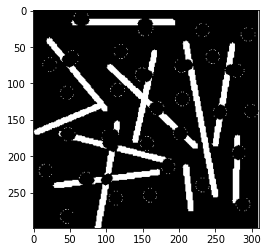

In [0]:
# Get lines by image subtraction of circles with original
linesInImage = circles_linesbin - circlesInImage
plt.imshow(linesInImage, cmap='gray')
plt.savefig('Lines.jpg')
files.download("Lines.jpg") 

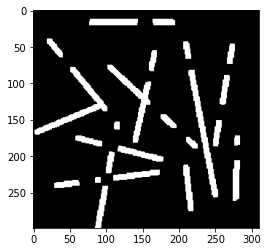

In [0]:
se1 = np.ones((5,5),np.uint8)
linesInImageD = cv2.morphologyEx(linesInImage, cv2.MORPH_OPEN, se1)
plt.imshow(linesInImageD, cmap='gray')
plt.savefig('LinesMorphology.jpg')
files.download("LinesMorphology.jpg") 

*4) Laplacian of Gausssian/The Marr-Hildreth Edge Detector: In this assignment you will
implement a second-derivative edge detector on the image north.png (first convert to
grayscale) using the Laplacian of Gaussian (LoG) method described on page 724 (G&W
book). Plot edges uses zero crossing. Also use a threshold of 4% similar to Fig 10.22 (pg.
728, G&W) to plot a second edge image. [10+10]*

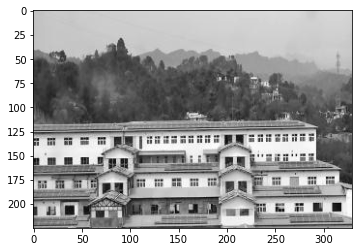

In [0]:
## Q4. Laplacian of Gausssian/The Marr-Hildreth Edge Detector
#Load the image
img4 = "/content/drive/My Drive/CVassignment-4/north.jpg"
northImage = cv2.imread(img4,0)
plt.imshow(northImage, cmap='gray')
plt.savefig('northImageGray.jpg')
files.download("northImageGray.jpg") 

In [0]:
ddepth = cv2.CV_16S
kernel_size = 3
sigma = 1 
n = 7
src = cv2.GaussianBlur(northImage, (n,n), sigma)
dst = cv2.Laplacian(src, ddepth, ksize=kernel_size)
abs_dst = cv2.convertScaleAbs(dst)

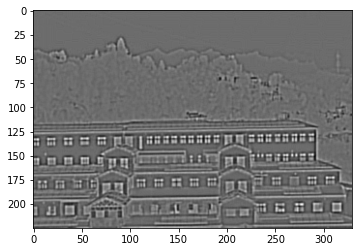

In [0]:
plt.imshow(dst, cmap='gray')
plt.savefig('northImagedst.jpg')
files.download("northImagedst.jpg") 

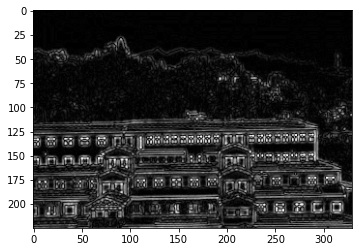

In [0]:
plt.imshow(abs_dst, cmap='gray')
plt.savefig('northImageabsdst.jpg')
files.download("northImageabsdst.jpg") 

In [0]:
# LoG = cv2.Laplacian(src, cv2.CV_16S)
minLoG = cv2.morphologyEx(dst, cv2.MORPH_ERODE, np.ones((3,3)))
maxLoG = cv2.morphologyEx(dst, cv2.MORPH_DILATE, np.ones((3,3)))
percent = 0
threshold = np.max(dst)*percent
zeroCross = np.logical_or(np.logical_and(minLoG < 0,  dst > threshold), np.logical_and(maxLoG > 0, dst < threshold))

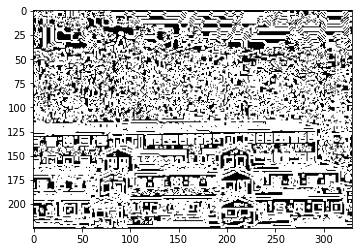

In [0]:
plt.imshow(zeroCross, cmap='gray')
plt.savefig('zeroCross.jpg')
files.download("zeroCross.jpg") 

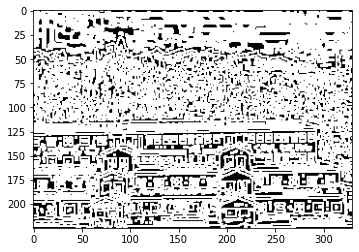

In [0]:
percent = 0.04
threshold = np.max(dst)*percent
zeroCross = np.logical_or(np.logical_and(minLoG < 0,  dst > threshold), np.logical_and(maxLoG > 0, dst < threshold))
plt.imshow(zeroCross, cmap='gray')
plt.savefig('zeroCrossGray.jpg')
files.download("zeroCrossGray.jpg") 

In [0]:
def Zero_crossing(image):
    z_c_image = np.zeros(image.shape)
    for i in range(1, image.shape[0] - 1):
        for j in range(1, image.shape[1] - 1):
            negative_count = 0
            positive_count = 0
            neighbour = [image[i+1, j-1],image[i+1, j],image[i+1, j+1],image[i, j-1],image[i, j+1],image[i-1, j-1],image[i-1, j],image[i-1, j+1]]
            d = max(neighbour)
            e = min(neighbour)
            for h in neighbour:
                if h>0:
                    positive_count += 1
                elif h<0:
                    negative_count += 1
            z_c = ((negative_count > 0) and (positive_count > 0))
            if z_c:
                if image[i,j]>0:
                    z_c_image[i, j] = image[i,j] + np.abs(e)
                elif image[i,j]<0:
                    z_c_image[i, j] = np.abs(image[i,j]) + d
                
    z_c_norm = z_c_image/z_c_image.max()*255
    z_c_image = np.uint8(z_c_norm)
 
    return z_c_image

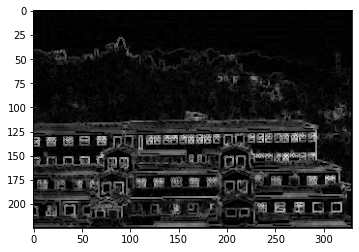

In [0]:
plt.imshow(Zero_crossing(dst),cmap='gray')

*5) In this assignment you will use your image processing knowledge to implement an edge
detection function that will be used in combination with a Hough-Transform for lines.
The goal of the Hough-Transform step is to outline the lines correctly identify the block
structure of top view of IIT Jammu. You will be graded upon the accuracy of structure
shown by your lines. [20]*

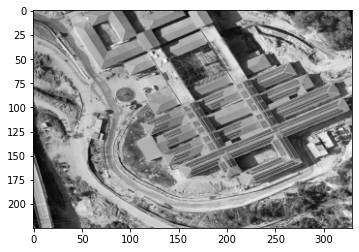

In [0]:
## Q5. Detecting lines using Hough transform
img5 = "/content/drive/My Drive/CVassignment-4/IITJammu_North_1.png"
IITJNorthImage = cv2.imread(img5,0)
plt.imshow(IITJNorthImage,cmap='gray')
plt.savefig('IITJNorthImageGray.jpg')
files.download("IITJNorthImageGray.jpg") 

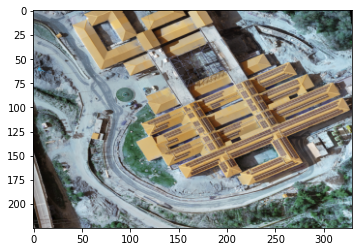

In [0]:
img5efficient = "/content/drive/My Drive/CVassignment-4/IITJammu_North_1.png"
IITJNorthImageefficient = cv2.imread(img5)
plt.imshow(IITJNorthImageefficient)
plt.savefig('IITJNorthImageefficient.jpg')
files.download("IITJNorthImageefficient.jpg") 

In [0]:
edges = cv2.Canny(IITJNorthImage,50,150,apertureSize = 3)
lines = cv2.HoughLines(edges,1,np.pi/180,200)

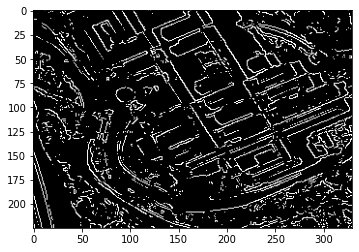

In [0]:
img = cv2.imread(img5)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,300,300)
plt.imshow(edges,cmap='gray')
plt.savefig('Canny.jpg')
files.download("Canny.jpg") 

In [0]:
Figsize = (5,5)
Threshold_binarization = 205
Canny_threshold_lower = 150
Canny_threshold_upper = 200
Hough_theta_step = np.pi / 180
Hough_rho_step = 1
Hough_threshold = 200
PIXEL_MAX = 255

In [0]:
def _plot(img):
    plt.figure(figsize=Figsize)
    plt.imshow(img, cmap=plt.cm.gray)

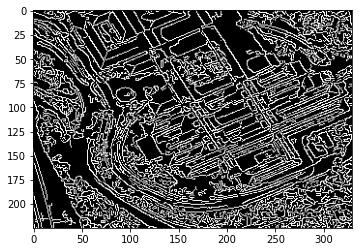

In [0]:
img = cv2.imread(img5)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,200)
plt.imshow(edges,cmap='gray')
plt.savefig('Cannyeffi.jpg')
files.download("Cannyeffi.jpg") 

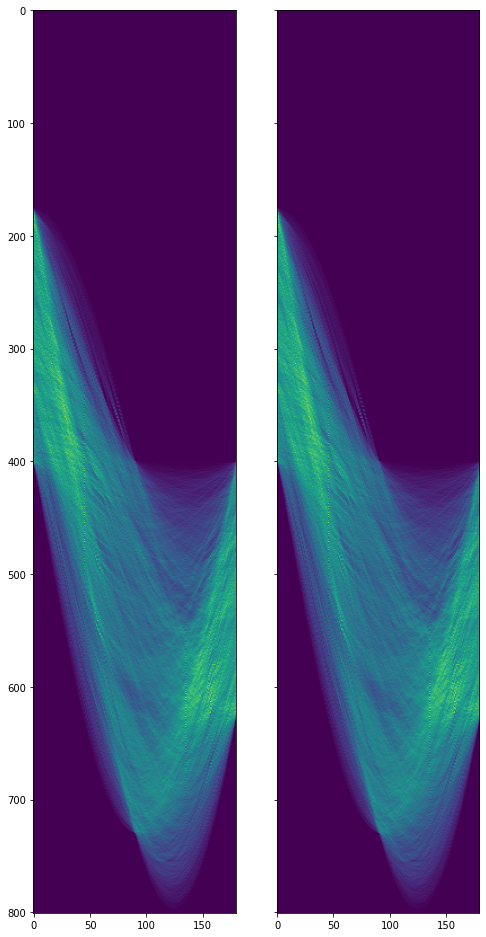

In [0]:
from skimage.feature import peak_local_max
from pylab import *

def get_lines(acc, thetas, rhos, threshold, min_distance):
    acc = np.where(acc>=threshold, acc, 0)
    lines_idx = peak_local_max(acc, min_distance=min_distance)
    sorted_idx = sorted(lines_idx, key=lambda x: acc[x[0]][x[1]], reverse=True)
    lines = []
    for ri,ti in sorted_idx:
        t = thetas[ti]
        r = rhos[ri]
        lines.append((t,r))
    return lines, sorted_idx

def hough_line(img, threshold, min_distance=20, theha_step=np.pi/180, rho_step=1, draw=False):
    theha_step_deg = np.rad2deg(theha_step)
    thetas = np.deg2rad(np.arange(-90.0, 90.0, step=theha_step_deg))
    width, height = img.shape
    max_r = int(np.ceil(np.sqrt(width * width + height * height)))
    rhos = np.arange(-max_r, max_r + 1, step=rho_step)

    acc = np.zeros((len(rhos), len(thetas)), dtype=np.uint8)
    y_idxs, x_idxs = np.nonzero(img)

    for i in range(len(x_idxs)):
        x = x_idxs[i]
        y = y_idxs[i]

        for t_idx in range(len(thetas)):
            t = thetas[t_idx]
            rho = int(round(x * np.cos(t) + y * np.sin(t))) + max_r
            acc[rho, t_idx] += 1

    lines,idx = get_lines(acc, thetas, rhos, threshold,min_distance)
    if draw:
        x,y = [t for r,t in idx], [r for r,t in idx]
        f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(8,25))
        ax1.imshow(acc)
        ax2.imshow(acc)
        ax2.plot(x,y, 'ro')
        ax2.autoscale(False)
        
    return lines
lines = hough_line(edges, threshold=Hough_threshold, theha_step=Hough_theta_step,rho_step=Hough_rho_step, min_distance=20, draw=True)

In [0]:
lol = cv2.imread(img5,0);
high_thresh, thresh_im = cv2.threshold(lol, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
lowThresh = 0.5*high_thresh
print(lowThresh)
print(high_thresh)

61.0
122.0


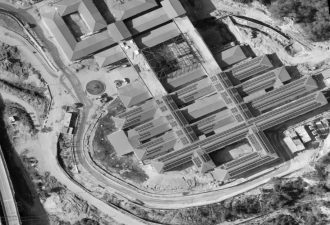

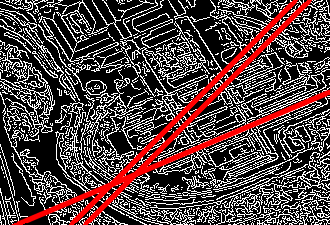

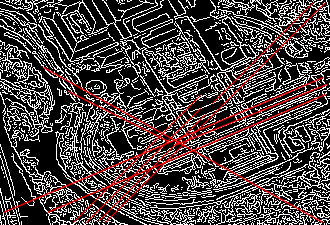

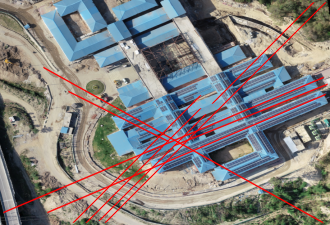

<Figure size 432x288 with 0 Axes>

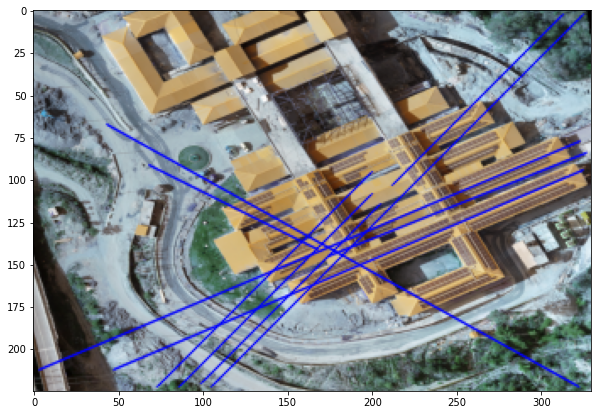

In [0]:
LinedImage = cv2.imread(img5);
src = cv2.imread(img5, cv2.IMREAD_GRAYSCALE)
dst = cv2.Canny(src, lowThresh, high_thresh, None, 3)   
cdst = cv2.cvtColor(dst, cv2.COLOR_GRAY2BGR)
cdstP = np.copy(cdst)
lines = cv2.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)

if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv2.line(cdst, pt1, pt2, (0,0,255), 3, cv2.LINE_AA)
linesP = cv2.HoughLinesP(dst, 1, np.pi / 180, threshold = 128, minLineLength = 100,maxLineGap = 10)

N = 10
if linesP is not None:
    for i in range(0, min(len(linesP),N)):
        l = linesP[i][0]
        cv2.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 1, cv2.LINE_AA)
        cv2.line(LinedImage, (l[0], l[1]), (l[2], l[3]), (0,0,255), 1, cv2.LINE_AA)
    

from google.colab.patches import cv2_imshow
cv2_imshow(src)
plt.savefig('src.jpg')
files.download("src.jpg") 
cv2_imshow(cdst)
plt.savefig('cdst.jpg')
files.download("cdst.jpg") 
cv2_imshow(cdstP)
plt.savefig('cdstP.jpg')
files.download("cdstP.jpg") 
cv2_imshow(LinedImage)
plt.savefig('LinedImage.jpg')
files.download("LinedImage.jpg") 
plt.figure(figsize=(10,10))
plt.imshow(LinedImage)
plt.savefig('LinedImage1.jpg')
files.download("LinedImage1.jpg") 
# https://docs.opencv.org/3.4/d9/db0/tutorial_hough_lines.html

In [0]:
def findcod(img,pt):
  p = img.shape[0]
  q = img.shape[1]
  thresh = [251,301]
  temp = thresh[1]/2-1/2-1
  max_theta = 180
  d_rho = int(np.sqrt(m*m+n*n)/temp)
  rho = (pt[0]-temp)*d_rho
  theta = pt[1]/(thresh[0]-1)*max_theta-90
  polar_coordinate = (rho,theta)
  return polar_coordinate

def plotLinesss(img,pts):
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  dim1 = img.shape[0]
  dim2 = img.shape[1]
  num_lines = 7
  y = np.arange(0,dim2)
  max_theta = 180 

  for i in range(num_lines):
    x_0 = 0
    x_n = 0
    pt = pts[i,0:2]
    rho,theta = findcod(img,pt)
    y_0 = 0
    x = (rho-(y-dim2/2)*np.sin(theta*np.pi/max_theta))/np.cos(theta*np.pi/max_theta)+(dim1/2)
    y_n = dim2
    for i in range(dim2-1):
      if(not x_0 and ((x[i]>dim1 and x[i+1]<dim1) or x[i]*x[i+1]<0)):
        x_n = i
        x_0 = 1

      elif(not y_0 and ((x[i+1]>dim1 and x[i]<dim1) or x[i]*x[i+1]<0)):
        y_n = i
        y_0 = 1
        
    plt.plot(y[x_n:y_n],x[x_n:y_n])
    plt.savefig('LinedImageEffi.jpg')
    files.download("LinedImageEffi.jpg") 

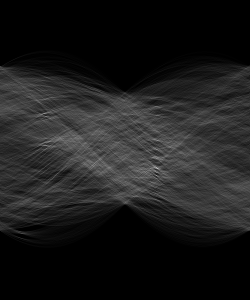

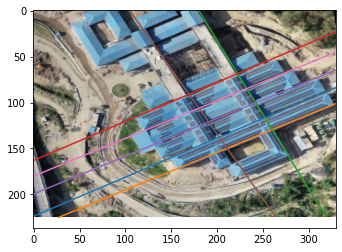

In [0]:
x = 300
y = 250
temp = x/2-1/2-1
accumulator = np.zeros((x,y))
theta_max = 180
gray = cv2.cvtColor(IITJNorthImageefficient, cv2.COLOR_BGR2GRAY)
minValue = 300
maxValue = 300
edge = cv2.Canny(gray, minValue, maxValue, apertureSize = 3)

def plotAccum(temp):
  num_lines = 7
  pts = np.zeros((num_lines,2))
  n = temp.shape[1]
  temp = np.array(temp)
  for i in range(num_lines):
    x=int((np.argmax(temp)-np.argmax(temp)%n)/n)
    y=np.argmax(temp)%n
    temp[x-5:x+6,y-5:y+6] = 0
    pts[i][0] = x
    pts[i][1] = y
        
  return pts

m = edge.shape[0]
n = edge.shape[1]
step = np.sqrt(m*m+n*n)/(temp)
step = int(step)
theta = np.arange(-90,95,180/(y-1))*np.pi/theta_max
for i in range(m):
  for j in range(n): 
    if(edge[i,j]):
      aux = (i-m/2)*np.cos(theta) + (j-n/2)*np.sin(theta)
      a = np.mod(aux, step)
      threshold = step/2
      aux[a>threshold] = aux[a>threshold]-a[a>threshold]+step
      increment = 1
      aux[a<=threshold] = aux[a<=threshold]-a[a<=threshold]
      for k in range(y):
        accumulator[int(aux[k]/step+temp),k] += increment

cv2_imshow(accumulator)
plt.savefig('accumulatorEffi.jpg')
files.download("accumulatorEffi.jpg") 

pts = plotAccum(accumulator)
plotLinesss(IITJNorthImageefficient,pts)

In [0]:
https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html
https://www.geeksforgeeks.org/erosion-dilation-images-using-opencv-python/
https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html

https://docs.scipy.org/doc/scipy-0.16.1/reference/generated/scipy.ndimage.morphology.binary_hit_or_miss.html
https://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.binary_erosion
https://docs.opencv.org/master/db/d06/tutorial_hitOrMiss.html
https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#ga67493776e3ad1a3df63883829375201f
https://homepages.inf.ed.ac.uk/rbf/HIPR2/erode.htm

In [0]:
https://datacarpentry.org/image-processing/09-connected-components/
https://stackoverflow.com/questions/46441893/connected-component-labeling-in-python
https://stackoverflow.com/questions/23297569/python-key-error-0-cant-find-dict-error-in-code

In [0]:
https://docs.opencv.org/3.4/d5/db5/tutorial_laplace_operator.html
https://stackoverflow.com/questions/25105916/laplacian-of-gaussian-in-opencv-how-to-find-zero-crossings
https://theailearner.com/2019/05/25/laplacian-of-gaussian-log/